YlGnBu-8
8 colors palette
    1. #ffffd9
    2. #edf8b1
    3. #c7e9b4
    4. #7fcdbb
    5. #41b6c4
    6. #1d91c0
    7. #225ea8
    8. #0c2c84

Touch frequency kiss last week
Touch frequency put arm around shoulder last week
Touch frequency intimate hug last week

How often have you and your partner touched each other in this way in the last week?

From Yvonee

Key predictors of higher touch frequency were
1. higher Relationship Satisfaction
2. more positive communication
3. shorter relationship duration
4. the absence of children
5. living together
6. younger age


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from statannotations.Annotator import Annotator

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
df2 = pd.read_csv('source/FReDA3.csv')

df2["Anchor Perception of Touch"] = "Satisfied"
df2["Partner Perception of Touch"] = "Satisfied"
df2["Couple Perception of Touch"] = "Satisfied"

temp1 = df2["Anchor Divergence"]
df2.loc[temp1 > 0, "Anchor Perception of Touch"] = "Deprived"
df2.loc[temp1 < 0, "Anchor Perception of Touch"] = "Saturated"

temp2 = df2["Partner Divergence"]
df2.loc[temp2 > 0, "Partner Perception of Touch"] = "Deprived"
df2.loc[temp2 < 0, "Partner Perception of Touch"] = "Saturated"

temp2 = df2["Couple Divergence"]
df2.loc[temp2 > 0, "Couple Perception of Touch"] = "Deprived"
df2.loc[temp2 < 0, "Couple Perception of Touch"] = "Saturated"

In [3]:
df2['Couple Perception of Touch'].value_counts()

Couple Perception of Touch
Deprived     4339
Satisfied    1965
Saturated     496
Name: count, dtype: int64

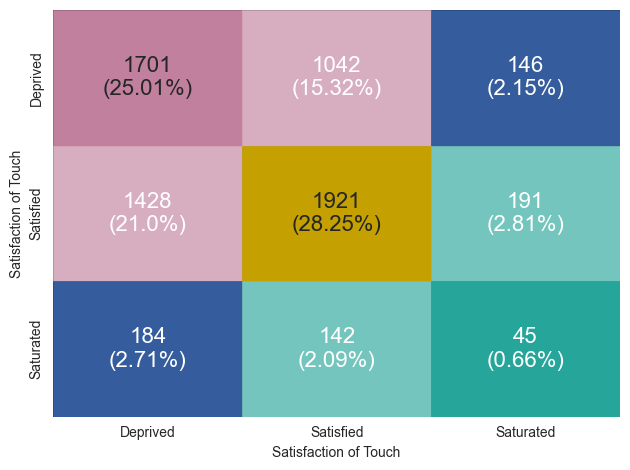

In [12]:
from matplotlib.colors import ListedColormap

df2['Anchor Perception of Touch'] = pd.Categorical(df2['Anchor Perception of Touch'],
                                                   categories=['Deprived', 'Satisfied', 'Saturated'], ordered=True)
df2['Partner Perception of Touch'] = pd.Categorical(df2['Partner Perception of Touch'],
                                                    categories=['Deprived', 'Satisfied', 'Saturated'], ordered=True)

crosstab = pd.crosstab(df2['Anchor Perception of Touch'],
                       df2['Partner Perception of Touch'])

crosstab_pct = pd.crosstab(df2['Anchor Perception of Touch'],
                           df2['Partner Perception of Touch'],
                           normalize='all') * 100

# annot = crosstab.applymap(lambda x: f"{x:.2f}%")
annot = crosstab.astype(str) + "\n(" + crosstab_pct.round(2).astype(str) + "%)"

cell_colors = np.array([
    ['#c1809e', '#d7adc0', '#355C9C'],
    ['#d7adc0', '#C4A000', '#73c5bd'],
    ['#355C9C', '#73c5bd', '#26a59a']
])

colours2 = ['#C4A000',
            '#c1809e',
            '#d7adc0',
            '#26a59a',
            '#73c5bd',
            '#355C9C']

fig, ax = plt.subplots()
sns.heatmap(
    data=crosstab,
    # annot=True,
    annot=annot,
    # fmt='d',
    fmt='',
    cbar=False,
    annot_kws={"fontsize": 16},
    linewidths=0.5,
    linecolor='black',
)
# Set the facecolor of each cell
for i in range(crosstab.shape[0]):
    for j in range(crosstab.shape[1]):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=cell_colors[i, j], edgecolor='black', lw=0.5))

plt.xlabel("Satisfaction of Touch")
plt.ylabel("Satisfaction of Touch")
plt.tight_layout()
plt.savefig('output/img_bg/poster/divergence2.png', dpi=600, transparent=False, bbox_inches='tight')

CORRELATION MAPS

In [6]:
ct = pd.crosstab(df2['Anchor Perception of Touch'], df2['Partner Perception of Touch'])
ct

Partner Perception of Touch,Deprived,Satisfied,Saturated
Anchor Perception of Touch,,,
Deprived,1701,1042,146
Satisfied,1428,1921,191
Saturated,184,142,45


Text(0, 0.5, 'Subjects')

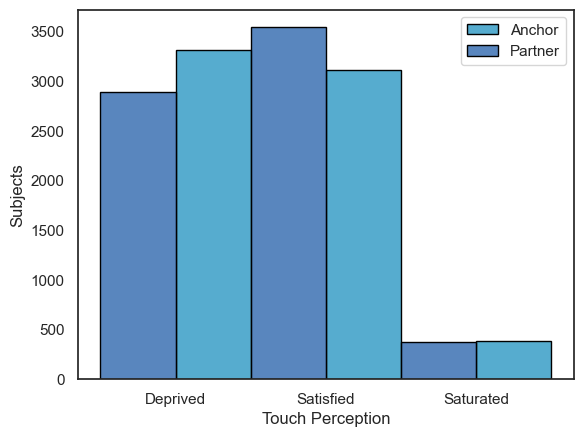

In [7]:
sns.set_theme(style='white')
df_melted = df2.melt(value_vars=['Anchor Perception of Touch', 'Partner Perception of Touch'],
                     var_name='Source', value_name='Value')

sns.histplot(data=df_melted, x='Value', hue='Source',
             element='bars',
             binwidth=0.5,
             palette=['#225ea8', '#1d91c0'],
             common_norm=False,
             multiple="dodge",
             linewidth=1,
             edgecolor='black',
             )
plt.grid(False)
plt.legend(loc='upper right', labels=["Anchor", "Partner"])
plt.xlabel("Touch Perception")
plt.ylabel("Subjects")
#plt.savefig('output/img_bg/perception_histogram.png', dpi=350, transparent=False, bbox_inches='tight')

In [8]:
touch_factors = [
    # 'Anchor Frequency of Touch',
    # 'Anchor Wish for Touch',
    # 'Partner Frequency of Touch',
    # 'Partner Wish for Touch',
    'Couple Frequency of Touch',
    'Couple Wish for Touch'
]

relationship_touch_factors = [
    # 'Anchor Divergence',
    # 'Partner Divergence',
    'Couple Divergence'
]

individual_factors = [
    'Anchor Sex',
    'Anchor Age',
    'Anchor Work Status',
    'Anchor East',
    'Anchor Urbanization',

    'Partner Sex',
    'Partner Age',
    'Partner Work Status',
    'Partner East',
    'Partner Urbanization'
]

personality_factors = [
    'Anchor Extraversion',
    'Anchor Agreeableness',
    'Anchor Conscientiousness',
    'Anchor Openness',
    'Anchor Neuroticism',
    'Anchor Conservatism',
    'Anchor Religiosity',

    'Partner Extraversion',
    'Partner Agreeableness',
    'Partner Conscientiousness',
    'Partner Openness',
    'Partner Neuroticism',
    'Partner Conservatism',
    'Partner Religiosity',
]

wellbeing_factors = [
    'Anchor Depressiveness',
    'Anchor Loneliness',
    'Anchor Self-esteem',
    'Anchor Life Satisfaction',
    'Anchor Health',

    'Partner Depressiveness',
    'Partner Loneliness',
    'Partner Self-esteem',
    'Partner Life Satisfaction',
    'Partner Health',
]

relationship_factors = [
    'Relationship Sex',
    'Relationship Length',
    'Age difference',
    'Married',
    'Cohabitation',
    'Kids',
    'Kid Age',

    'Anchor Communication Quality',
    'Anchor Relationship Satisfaction',
    'Anchor Conflict Management',

    'Partner Communication Quality',
    'Partner Relationship Satisfaction',
    'Partner Conflict Management',
]

In [9]:
cols = touch_factors + relationship_touch_factors + individual_factors + personality_factors + wellbeing_factors + relationship_factors

# Initialize matrices for correlation and p-values
corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
pval_matrix = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)

# Fill in the matrices
for i in range(len(cols)):
    for j in range(i, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        r, p = spearmanr(df2[col1], df2[col2], nan_policy='omit')
        corr_matrix.loc[col1, col2] = r
        corr_matrix.loc[col2, col1] = r
        pval_matrix.loc[col1, col2] = p
        pval_matrix.loc[col2, col1] = p